# Use of Force - Incidents and Subjects Analysis

## Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-process Incidents Data

In [5]:
#Use_of_force_incidents_api = 'https://data.cityofnewyork.us/resource/f4tj-796d.json'
#Use_of_force_incidents_df = data_loader.load_file(Use_of_force_incidents_api)
Use_of_force_incidents_df = pd.read_csv('./NYPD_Use_of_Force_Incidents.csv')
Use_of_force_incidents_df
#Use_of_force_subjects_df

,TRI Incident Number,ForceType,Occurrence Date,Incident Pct,Patrol Borough,YearMonthShort,BasisForEncounter
0,2023094962399,Physical Force,09/21/2023,75,PBBN,2023 Sep,CRIME/VIOLATION IN PROGRESS
1,2023059962344,Physical Force,09/13/2023,40,PBBX,2023 Sep,CRIME/VIOLATION IN PROGRESS
2,2023064962120,Physical Force,09/13/2023,45,PBBX,2023 Sep,CRIME/VIOLATION IN PROGRESS
3,2023140962087,Physical Force,09/08/2023,121,PBSI,2023 Sep,CRIME/VIOLATION IN PROGRESS
4,2023053962127,Physical Force,08/27/2023,34,PBMN,2023 Aug,CRIME/VIOLATION IN PROGRESS
...,...,...,...,...,...,...,...
29818,2020065962087,Electrical Weapon,03/14/2020,46,PBBX,2020 Mar,OTHER
29819,2020067962036,Electrical Weapon,02/27/2020,48,PBBX,2020 Feb,OTHER
29820,2020065962062,Electrical Weapon,02/26/2020,46,PBBX,2020 Feb,OTHER
29821,2020071962061,Electrical Weapon,02/21/2020,52,PBBX,2020 Feb,OTHER


#### Check for Nan values

In [6]:
Use_of_force_incidents_df.isna().sum()

TRI Incident Number    0
ForceType              0
Occurrence Date        0
Incident Pct           0
Patrol Borough         2
YearMonthShort         0
BasisForEncounter      0
dtype: int64

#### Check for rows with None/null/Nan values

In [7]:
basis_mask = Use_of_force_incidents_df['BasisForEncounter'].str.contains('None|null|Nan', na=True, case=False)
patrol_borough_mask = Use_of_force_incidents_df['Patrol Borough'].str.contains('None|null|Nan', na=True, case=False)
forcetype_mask = Use_of_force_incidents_df['ForceType'].str.contains('None|null|Nan', na=True, case=False)

# The resulting DataFrame with the matched rows
basis_matched_rows = Use_of_force_incidents_df[basis_mask]
patrol_borough_matched_rows = Use_of_force_incidents_df[patrol_borough_mask]
forcetype_matched_rows = Use_of_force_incidents_df[forcetype_mask]

print(f"Number of null values in BasisForEncounter is {basis_matched_rows.__len__()}")
print(f"Number of null values in Patrol Borough' is {patrol_borough_matched_rows.__len__()}")
print(f"Number of null values in ForceType is {forcetype_matched_rows.__len__()}")

Number of null values in BasisForEncounter is 0
Number of null values in Patrol Borough' is 2
Number of null values in ForceType is 0


#### Patrol Borough has 2 Na, drop them

In [8]:
Use_of_force_incidents_df=Use_of_force_incidents_df.dropna()

#### Borough Mapping

In [11]:
borough_mapping = {
    'PBBX': 'Bronx', 
    'PBSI': 'Staten Island', 
    'PBMN': 'Manhattan', 
    'PBMS': 'Manhattan',
    'PBBN': 'Brooklyn', 
    'PBBS': 'Brooklyn', 
    'PBQS': 'Queens', 
    'PBQN': 'Queens'
}

In [12]:
Use_of_force_incidents_df['Patrol Borough'] = Use_of_force_incidents_df['Patrol Borough'].map(borough_mapping)

/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_2630/3586532941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Use_of_force_incidents_df['Patrol Borough'] = Use_of_force_incidents_df['Patrol Borough'].map(borough_mapping)


#### Converting Occurence Date to datetime

In [13]:
Use_of_force_incidents_df['Occurrence Date'] = pd.to_datetime(Use_of_force_incidents_df['Occurrence Date'])

/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_2630/3924705642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Use_of_force_incidents_df['Occurrence Date'] = pd.to_datetime(Use_of_force_incidents_df['Occurrence Date'])


#### Dropping YearMonthShort

- it does not have much significance
- We will use only Occurence Data

In [14]:
Use_of_force_incidents_df = Use_of_force_incidents_df.drop('YearMonthShort', axis=1)

## Pre-processing Subjects Dataframe

In [15]:
Use_of_force_subjects_df = pd.read_csv('./NYPD_Use_of_Force_Subjects.csv')
Use_of_force_subjects_df

,TRI Incident Number,Subject Injury Level,Subject Injured,Age,Subject Race,Subject Gender,Force Against MOS,Subject Used Force
0,2020020962067,No Injury,N,NaN,BLACK,MALE,Physical Force,Y
1,2020020962143,No Injury,N,NaN,BLACK,MALE,Physical Force,Y
2,2020024962080,No Injury,N,NaN,BLACK,MALE,Physical Force,Y
3,2020025962038,No Injury,N,NaN,BLACK,MALE,Physical Force,Y
4,2020025962049,No Injury,N,NaN,BLACK,MALE,Physical Force,Y
...,...,...,...,...,...,...,...,...
29956,2023091962030,Serious Physical Injury,Y,42.0,ASIAN,MALE,Impact Weapon,Y
29957,2023100962045,Death,Y,78.0,BLACK,MALE,Displayed Weapon,Y
29958,2023122962104,Serious Physical Injury,Y,59.0,BLACK,MALE,Displayed Weapon,Y
29959,2023133962151,Death,Y,21.0,BLACK,MALE,Displayed Weapon,Y


#### Check for null values

In [16]:
Use_of_force_subjects_df.isnull().sum()

TRI Incident Number        0
Subject Injury Level       0
Subject Injured            0
Age                     1229
Subject Race               0
Subject Gender             0
Force Against MOS          0
Subject Used Force         0
dtype: int64

#### Handling Age Missing values

In [17]:
Use_of_force_subjects_df['Age'].fillna(Use_of_force_subjects_df['Age'].median(), inplace=True)

### Dropping Non-important columns

In [18]:
Use_of_force_subjects_df = Use_of_force_subjects_df.drop('Subject Used Force', axis=1)
Use_of_force_subjects_df = Use_of_force_subjects_df.drop('Subject Injured', axis=1)
Use_of_force_subjects_df = Use_of_force_subjects_df.drop('Subject Injury Level', axis=1)
Use_of_force_subjects_df

,TRI Incident Number,Age,Subject Race,Subject Gender,Force Against MOS
0,2020020962067,29.0,BLACK,MALE,Physical Force
1,2020020962143,29.0,BLACK,MALE,Physical Force
2,2020024962080,29.0,BLACK,MALE,Physical Force
3,2020025962038,29.0,BLACK,MALE,Physical Force
4,2020025962049,29.0,BLACK,MALE,Physical Force
...,...,...,...,...,...
29956,2023091962030,42.0,ASIAN,MALE,Impact Weapon
29957,2023100962045,78.0,BLACK,MALE,Displayed Weapon
29958,2023122962104,59.0,BLACK,MALE,Displayed Weapon
29959,2023133962151,21.0,BLACK,MALE,Displayed Weapon


## Join the Tables

In [19]:
Use_of_force_combined_df = pd.merge(Use_of_force_incidents_df, Use_of_force_subjects_df, on='TRI Incident Number', how='inner')
Use_of_force_combined_df

,TRI Incident Number,ForceType,Occurrence Date,Incident Pct,Patrol Borough,BasisForEncounter,Age,Subject Race,Subject Gender,Force Against MOS
0,2023094962399,Physical Force,2023-09-21,75,Brooklyn,CRIME/VIOLATION IN PROGRESS,35.0,HISPANIC,MALE,Physical Force
1,2023059962344,Physical Force,2023-09-13,40,Bronx,CRIME/VIOLATION IN PROGRESS,19.0,BLACK,MALE,Physical Force
2,2023064962120,Physical Force,2023-09-13,45,Bronx,CRIME/VIOLATION IN PROGRESS,45.0,BLACK,MALE,Physical Force
3,2023140962087,Physical Force,2023-09-08,121,Staten Island,CRIME/VIOLATION IN PROGRESS,60.0,BLACK,MALE,Physical Force
4,2023053962127,Physical Force,2023-08-27,34,Manhattan,CRIME/VIOLATION IN PROGRESS,29.0,HISPANIC,MALE,Physical Force
...,...,...,...,...,...,...,...,...,...,...
29953,2020128962045,Physical Force,2020-09-06,109,Queens,VTL INFRACTION,42.0,HISPANIC,MALE,Physical Force
29954,2020128962045,Physical Force,2020-09-06,109,Queens,VTL INFRACTION,22.0,HISPANIC,FEMALE,Physical Force
29955,2020062962071,Physical Force,2020-03-04,43,Bronx,CRIME/VIOLATION IN PROGRESS,14.0,HISPANIC,FEMALE,Physical Force
29956,2020062962071,Physical Force,2020-03-04,43,Bronx,CRIME/VIOLATION IN PROGRESS,15.0,HISPANIC,FEMALE,Physical Force


## EDA

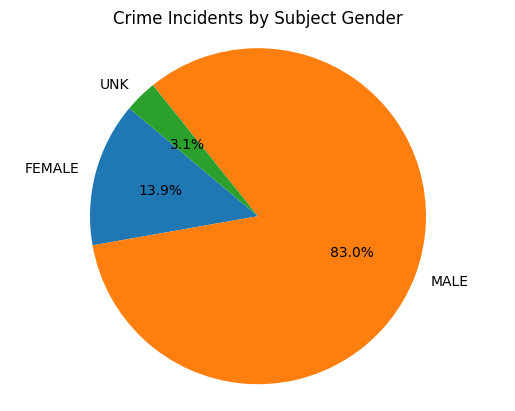

In [20]:
gender_data = Use_of_force_combined_df.groupby('Subject Gender').size()

# Plot
gender_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Crime Incidents by Subject Gender')
plt.show()

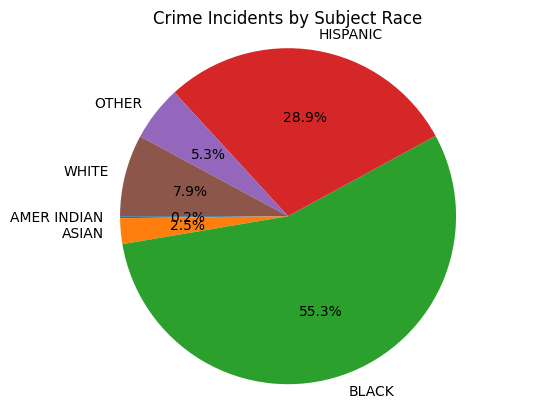

In [21]:
# Group by race and count incidents
race_data = Use_of_force_combined_df.groupby('Subject Race').size()

# Plot
race_data.plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title('Crime Incidents by Subject Race')
plt.show()

### Top 10 Precincts - Borough-wise

/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_2630/3324320903.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=borough_data, x='Incident Pct', y='counts', palette='viridis', ax=axes[i])
/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_2630/3324320903.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=borough_data, x='Incident Pct', y='counts', palette='viridis', ax=axes[i])
/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_2630/3324320903.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.ba

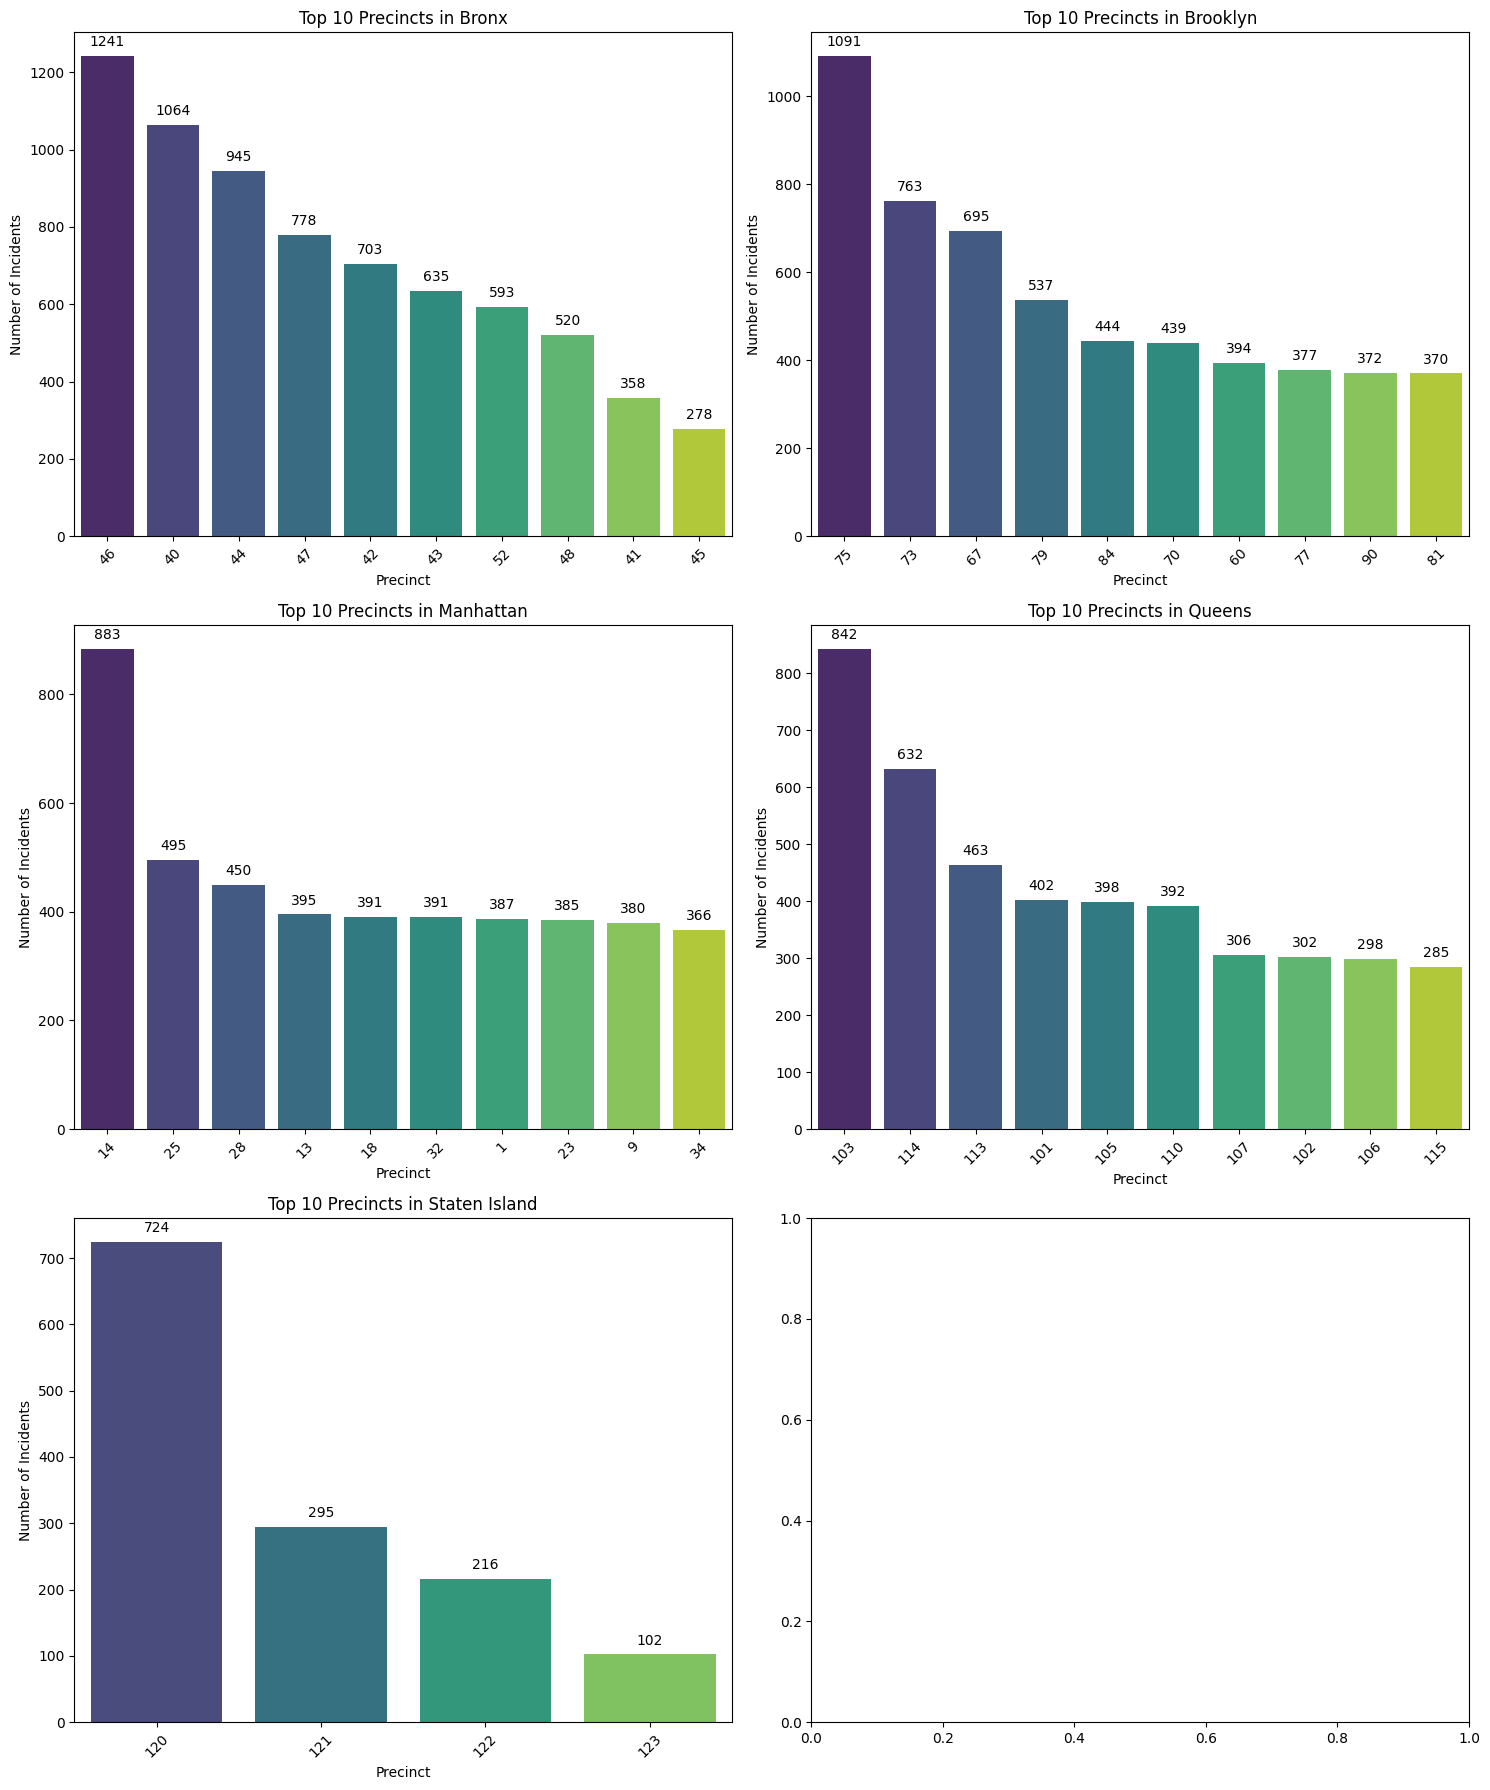

In [22]:
borough_precinct_data = Use_of_force_combined_df.groupby(['Patrol Borough', 'Incident Pct']).size().reset_index(name='counts')

# Get top 10 precincts for each borough
top_precincts = borough_precinct_data.groupby('Patrol Borough').apply(lambda x: x.nlargest(10, 'counts')).reset_index(drop=True)

# Convert 'Incident Pct' to a string
top_precincts['Incident Pct'] = top_precincts['Incident Pct'].astype(str)

# Unique list of boroughs
boroughs = top_precincts['Patrol Borough'].unique()

# Determine the number of rows needed for the subplots
num_rows = (len(boroughs) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 6))
axes = axes.flatten()  # Flatten the array for easy iteration

# Plot for each borough
for i, borough in enumerate(boroughs):
    borough_data = top_precincts[top_precincts['Patrol Borough'] == borough]
    ax=sns.barplot(data=borough_data, x='Incident Pct', y='counts', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Top 10 Precincts in {borough}')
    axes[i].set_xlabel('Precinct')
    axes[i].set_ylabel('Number of Incidents')
    axes[i].tick_params(axis='x', rotation=45)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

### Least 10 Precincts - Borough-wise

/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_2630/4229418613.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=borough_data, x='Incident Pct', y='counts', palette='viridis', ax=axes[i])
/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_2630/4229418613.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=borough_data, x='Incident Pct', y='counts', palette='viridis', ax=axes[i])
/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_2630/4229418613.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.ba

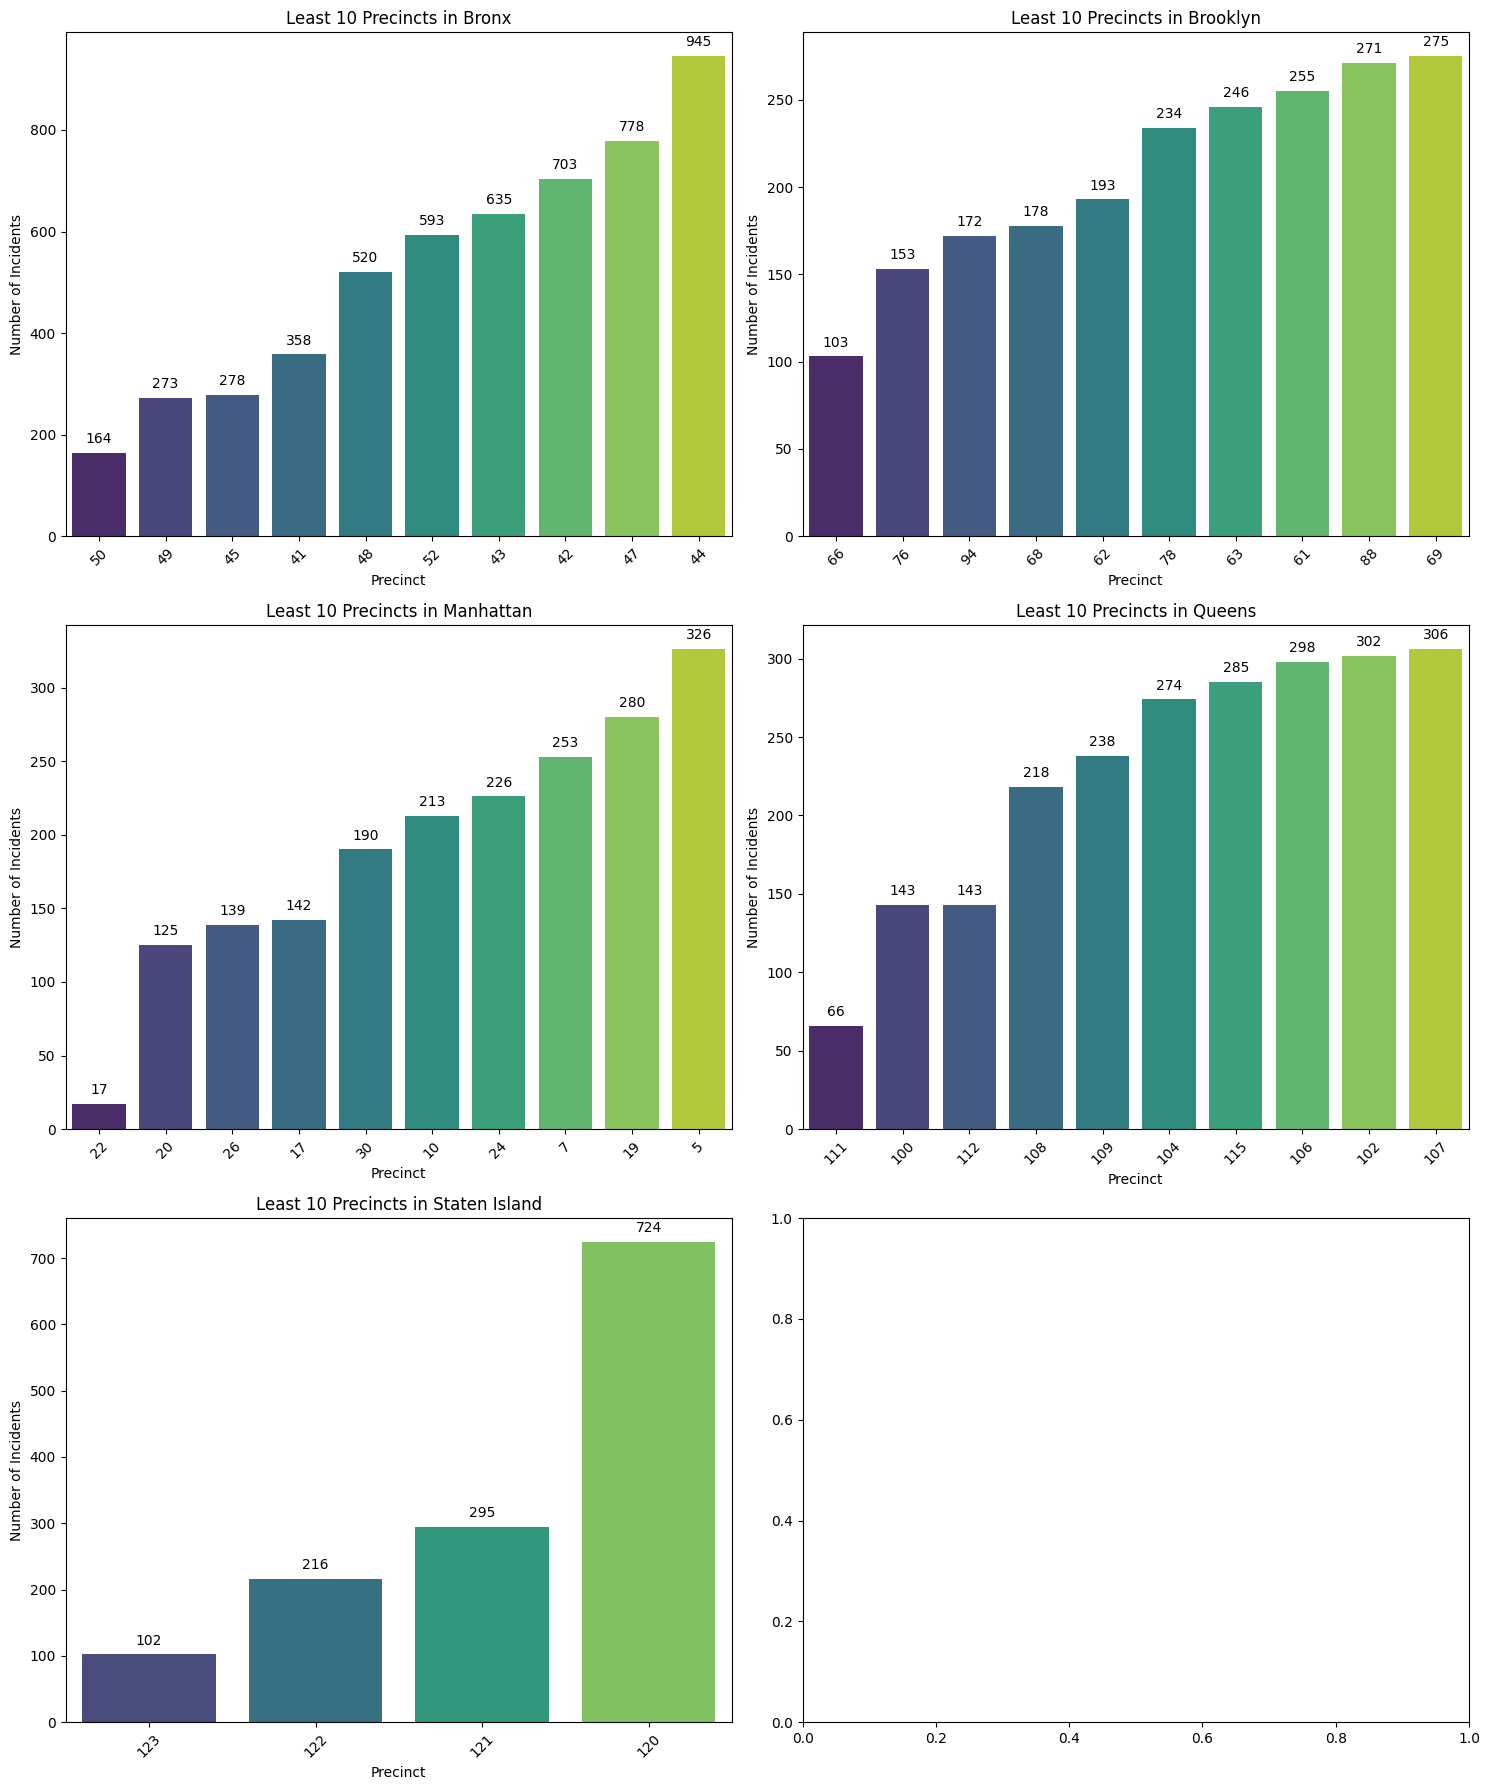

In [23]:
borough_precinct_data = Use_of_force_combined_df.groupby(['Patrol Borough', 'Incident Pct']).size().reset_index(name='counts')

# Get least 10 precincts for each borough
least_precincts = borough_precinct_data.groupby('Patrol Borough').apply(lambda x: x.nsmallest(10, 'counts')).reset_index(drop=True)

# Convert 'Incident Pct' to a string
least_precincts['Incident Pct'] = least_precincts['Incident Pct'].astype(str)

# Unique list of boroughs
boroughs = least_precincts['Patrol Borough'].unique()

# Determine the number of rows needed for the subplots
num_rows = (len(boroughs) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 6))
axes = axes.flatten()  # Flatten the array for easy iteration

# Plot for each borough
for i, borough in enumerate(boroughs):
    borough_data = least_precincts[least_precincts['Patrol Borough'] == borough]
    ax=sns.barplot(data=borough_data, x='Incident Pct', y='counts', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Least 10 Precincts in {borough}')
    axes[i].set_xlabel('Precinct')
    axes[i].set_ylabel('Number of Incidents')
    axes[i].tick_params(axis='x', rotation=45)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

#### Subject Age Analysis

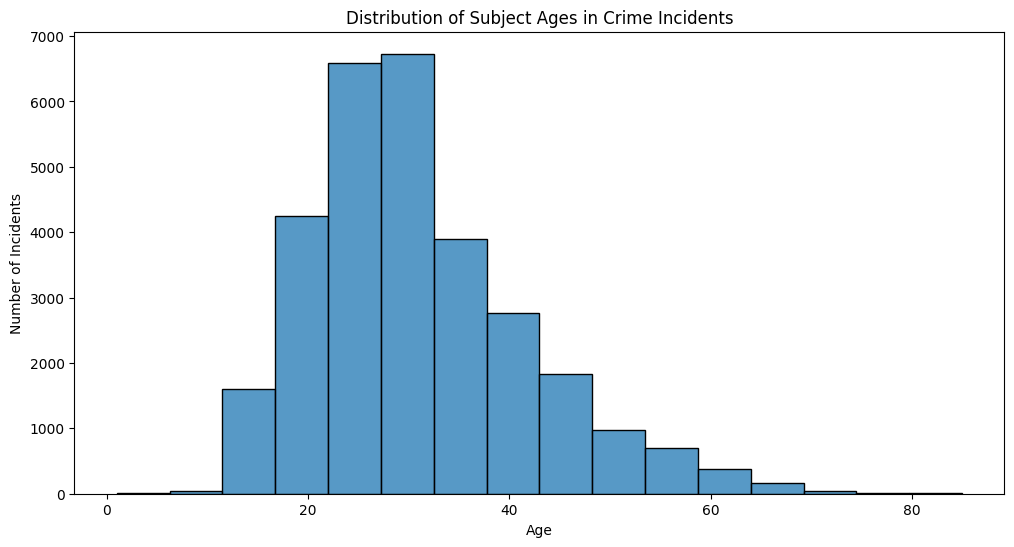

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(Use_of_force_combined_df['Age'], bins=16, kde=False)  # Adjust number of bins as needed
plt.title('Distribution of Subject Ages in Crime Incidents')
plt.xlabel('Age')
plt.ylabel('Number of Incidents')
plt.show()

#### Age Distribution by Subject Race

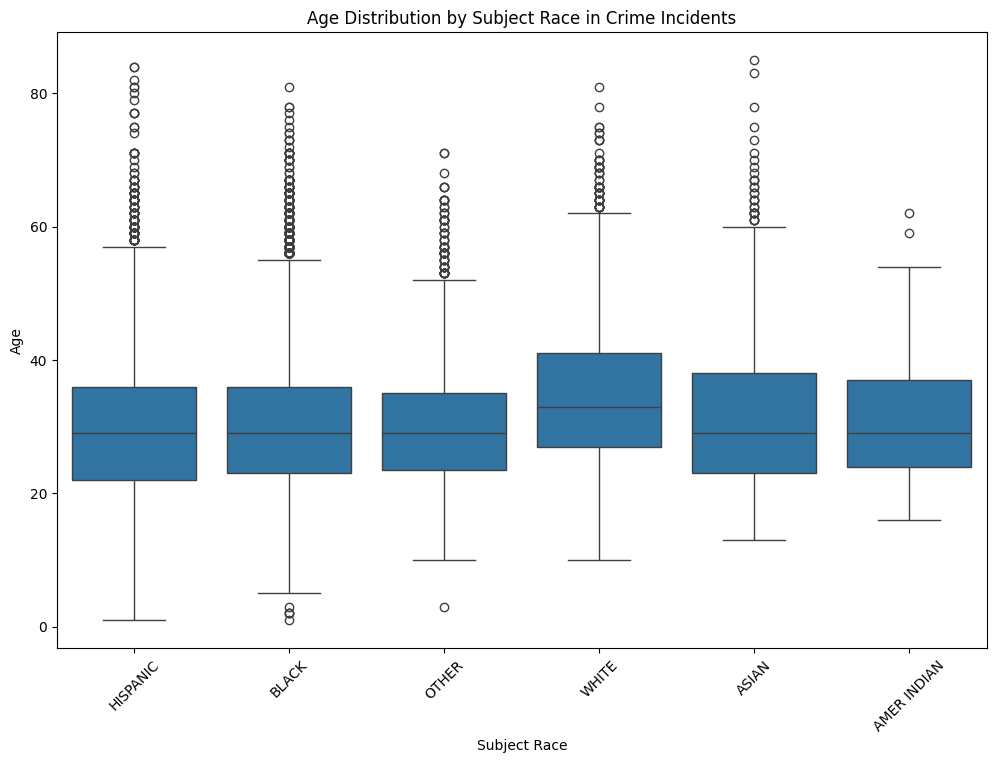

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Subject Race', y='Age', data=Use_of_force_combined_df)
plt.title('Age Distribution by Subject Race in Crime Incidents')
plt.xlabel('Subject Race')
plt.ylabel('Age')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

#### Day-of-the-week Analysis

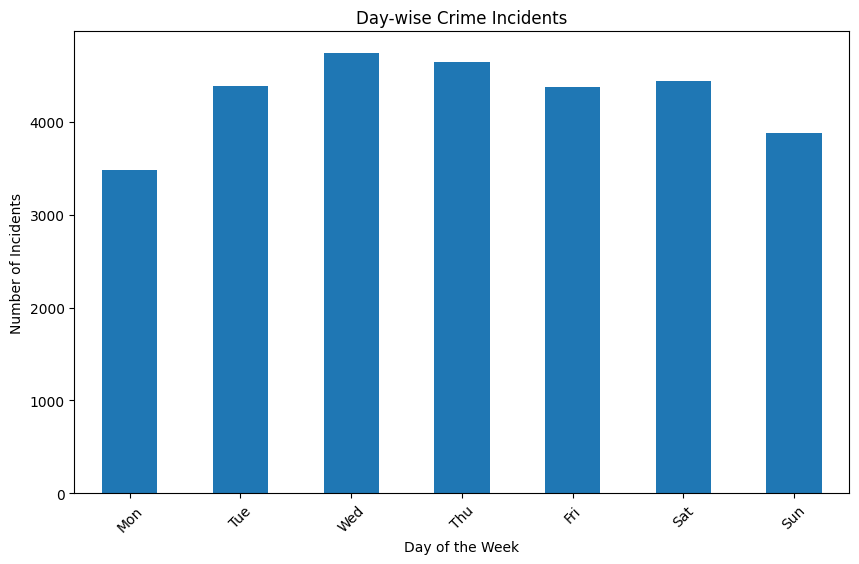

In [27]:
daywise_data=Use_of_force_combined_df['Occurrence Date'].dt.dayofweek.groupby(Use_of_force_combined_df['Occurrence Date'].dt.dayofweek).size()

# Plot
plt.figure(figsize=(10, 6))
daywise_data.plot(kind='bar')
plt.title('Day-wise Crime Incidents')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

### Month-wise Analysis

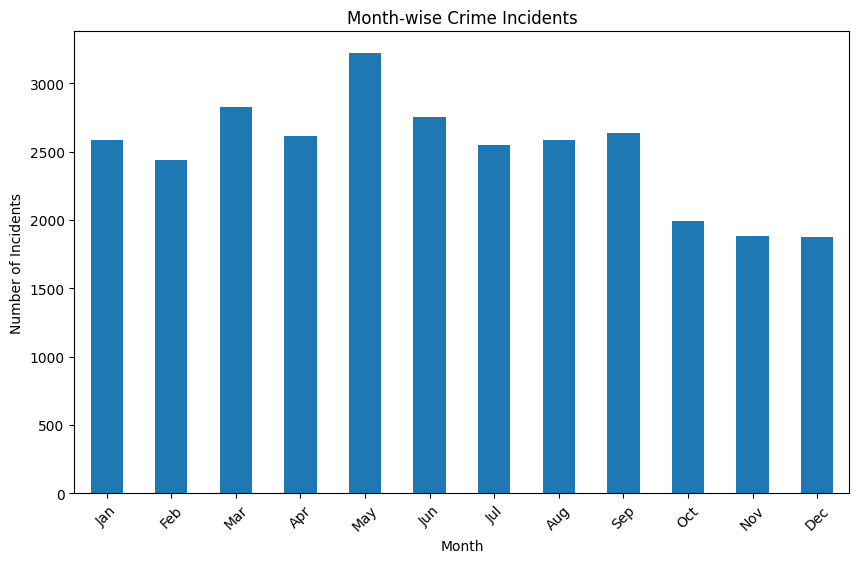

In [28]:
monthly_data = Use_of_force_combined_df['Occurrence Date'].dt.month.groupby(Use_of_force_combined_df['Occurrence Date'].dt.month).size()

# Plot
plt.figure(figsize=(10, 6))
monthly_data.plot(kind='bar')
plt.title('Month-wise Crime Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

### Year-wise Analysis

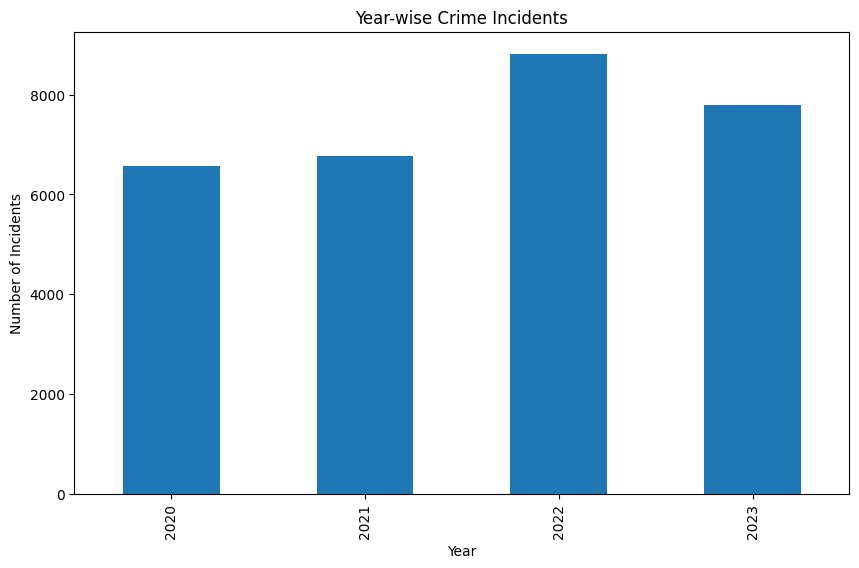

In [29]:
yearly_data=Use_of_force_combined_df['Occurrence Date'].dt.year.groupby(Use_of_force_combined_df['Occurrence Date'].dt.year).size()

# Plot
plt.figure(figsize=(10, 6))
yearly_data.plot(kind='bar')
plt.title('Year-wise Crime Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

### Frequency of Force against MOS

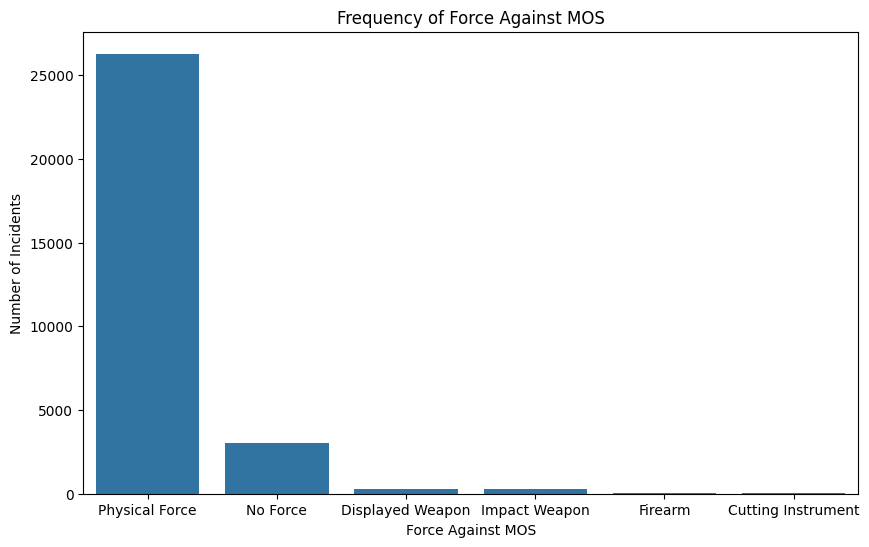

In [30]:
# Count the occurrences of force against MOS
force_against_mos_counts = Use_of_force_combined_df['Force Against MOS'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=force_against_mos_counts.index, y=force_against_mos_counts.values)
plt.title('Frequency of Force Against MOS')
plt.xlabel('Force Against MOS')
plt.ylabel('Number of Incidents')
plt.show()

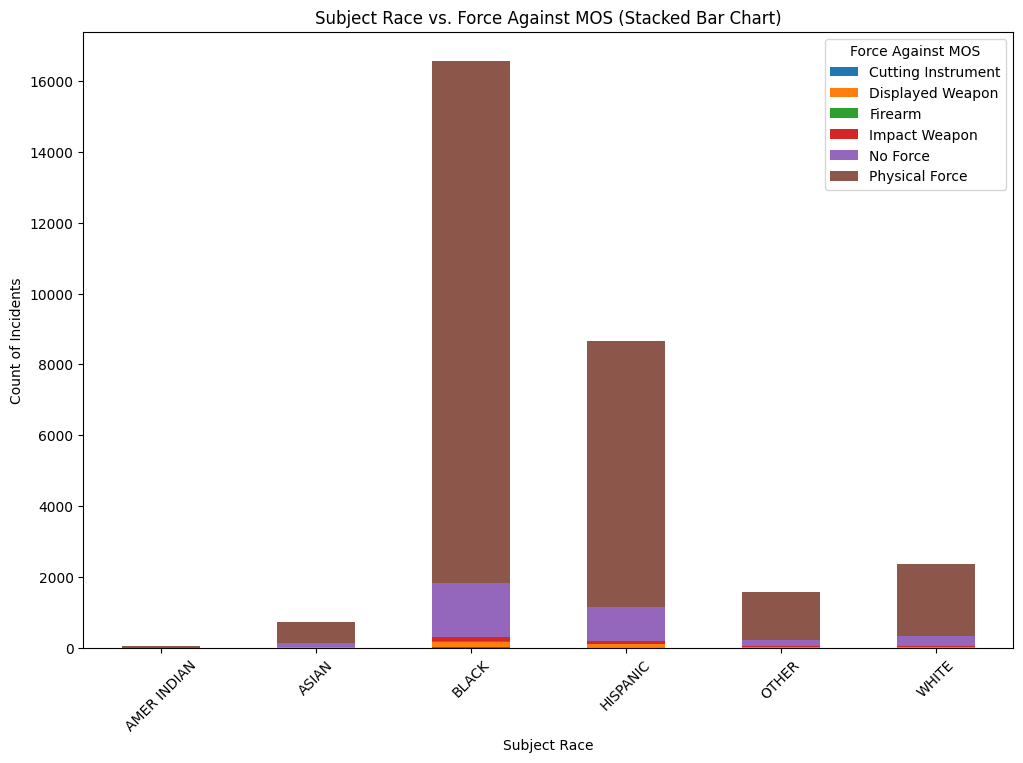

In [31]:
race_force_mos_ct = pd.crosstab(Use_of_force_combined_df['Subject Race'], Use_of_force_combined_df['Force Against MOS'])

# Plot stacked bar chart
race_force_mos_ct.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Subject Race vs. Force Against MOS (Stacked Bar Chart)')
plt.xlabel('Subject Race')
plt.ylabel('Count of Incidents')
plt.legend(title='Force Against MOS')
plt.xticks(rotation=45)
plt.show()

## Age Outliers Analysis

In [32]:
Use_of_force_combined_df[Use_of_force_combined_df['Age'] < 10].count()

TRI Incident Number    22
ForceType              22
Occurrence Date        22
Incident Pct           22
Patrol Borough         22
BasisForEncounter      22
Age                    22
Subject Race           22
Subject Gender         22
Force Against MOS      22
dtype: int64

## Neighborhood Mapping

In [133]:
nypd_precincts_neighborhoods = {
    1: 'World Trade Center/SOHO/Tribeca/Wall Street.',
    5: 'Chinatown/Little Italy',
    6: 'Greenwich Village/West Village',
    7: 'Williamsburg Bridge/Orchard Street',
    9: 'East Village',
    10: 'Chelsea, Clinton/Hell\'s Kitchen South/Hudson Yards',
    13: 'Peter Cooper Village/Stuyvesant Town residential complex/Gramercy Park/Rosehill/Madison Square Park/Union Square Park',
    17: 'Sutton Area/Beekman Place/Kipps Bay/Turtle Bay/Murray Hill/Rose Hill Community',
    19: 'Madison/Lexington/3rd Avenues',
    20: 'Lincoln Center for the Performing Arts/the American Museum of Natural History/the New York Historical Society/the Beacon Theater/the Jewish Community Center of Manhattan',
    23: 'East Harlem',
    24: 'Manhattan Valley/Riverside Park',
    25: 'Marcus Garvey Park/Harlem Art Park/125th Street Metro-North Station',
    26: 'Morningside Heights/Manhattanville',
    28: 'Central Harlem',
    30: 'Hamilton Heights/Sugar Hill/West Harlem',
    32: 'Northeast Harlem',
    33: 'Washington Heights',
    34: 'Inwood',
    40: 'Port Morris/Mott Haven/Melrose',
    41: 'Hunts Point/Longwood',
    42: 'Claremont Village/Crotona Park East/Crotona Park',
    43: 'Westchester Avenue/Castle Hill Avenue/White Plains Road/Parkchester',
    44: 'Grand Concourse/Bronx Terminal Market/Yankee Stadium',
    45: 'Co-op City/City Island',
    46: 'Fordham/University Heights/Morris Heights/Mount Hope',
    47: 'Woodlawn/Wakefield/Williamsbridge/Baychester/Edenwald, Olinville/Fishbay',
    48: 'Belmont/East Tremont/West Farms',
    49: 'Allerton/Morris Park/Van Nest/Pelham Parkway/Eastchester Gardens/Pelham Gardens',
    50: 'Riverdale/Fieldston/Kingsbridge/Marble Hill/Spuyten Duyvil',
    51: 'Bedford Park/Fordham/Kingsbridge/Norwood/Bronx Park/University Heights',
    60: 'Coney Island/Brighton Beach/West Brighton Beach/Sea Gate',
    61: 'Sheepshead Bay/Kings Bay/Gravesend/Manhattan Beach',
    62: 'Bensonhurst/Mapleton/Bath Beach',
    63: 'Marine Park',
    66: 'Borough Park',
    67: 'East Flatbush/Remsen Village',
    68: 'Bay Ridge/Dyker Heights',
    69: 'Canarsie',
    70: 'Midwood/Fiske Terrace/Ditmas Park',
    71: 'Southern Crown Heights/Wingate/Prospect Lefferts',
    72: 'Sunset Park/Windsor Terrace',
    73: 'Brownsville/Ocean Hill',
    75: 'East New York/Cypress Hills',
    76: 'Carroll Gardens/Red Hook/Cobble Hill/Columbia Street Waterfront District',
    77: 'Prospect Heights/Northern Crown Heights',
    78: 'Park Slope/Prospect Park',
    79: 'Bedford Stuyvesant/Herbert Von King Park',
    81: 'Stuyvesant Heights',
    83: 'Bushwick',
    84: 'Brooklyn Heights/Boerum Hill/Vinegar Hill',
    88: 'Clinton Hill/Fort Green Park/Commodore Barry Park',
    90: 'Williamsburg',
    94: 'Greenpoint',
    100: 'Arverne/Belle Harbor/Breezy Point/Broad Channel/Neponsit/Rockaway Park/Rockaway Beach/Roxbury',
    101: 'Far Rockaway/Bayswater',
    102: 'Kew Gardens/Richmond Hill/Woodhaven',
    103: 'Jamaica Business District/Hollis Park Gardens/Hollis/Lakewood/Jamaica',
    104: 'Ridgewood/Glendale/Middle Village/Maspeth',
    105: 'Queens Village/Cambria Heights/Laurelton/Rosedale/Springfield Gardens/Bellerose/Glen Oaks/New Hyde Park/Floral Park',
    106: 'Ozone Park/South Ozone Park/Lindenwood/Howard Beach/Old Howard Beach',
    107: 'Fresh Meadows/Cunningham Heights/Hilltop Village',
    108: 'Long Island City/Sunnyside/Woodside',
    109: 'Downtown Flushing/East Flushing/Queensboro Hill/College Point/Malba/Whitestone/Beechhurst/Bay Terrace',
    110: 'Elmhurst/Corona/Roosevelt Avenue/Broadway/Queens Blvd',
    111: 'Bayside/Douglaston/Little Neck/Auburndale/Hollis Hills',
    112: 'Forest Hills/Rego Park',
    113: 'St. Albans/Hollis/Springfield Gardens/South Ozone Park/South Jamaica/Addisleigh Park/Locust Manor',
    114: 'Astoria/Long Island City/Woodside/Jackson Heights',
    115: 'East Elmhurst/North Corona',
    120: 'Castleton Corners/Westerleigh/Meiers Corners/Markham Gardens/Fort Wadsworth/Tompkinsville/Concord/Sunnyside, West Brighton/Livingston/Randall Manor/New Brighton/St. George/Ward Hill/Stapleton/Clifton/Silver Lake/Grymes Hill/Fox Hills/Shore Acres/Rosebank.',
    121: "Willowbrook/Westerleigh/Port Richmond/Mariner's Harbor/Elm Park/Port Ivory/Chelsea/Bloomfield",
    122: 'Eltingville/Great Kills/Bay Terrace/Oakwood Heights, Oakwood Beach/Lighthouse Hill/New Dorp/Grant City/Midland Beach/South Beach/Todt Hill/Old Town/Grasmere',
    123: 'Tottenville/Huguenot/Rossville/Annadale/Eltingville',
}